<a href="https://colab.research.google.com/github/theAkhileshRai/DeepLearning/blob/master/tensorflow/TF_MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow==1.3

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

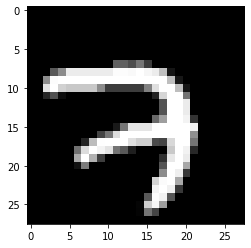

In [16]:
plt.imshow(mnist.train.images[0].reshape(28,28),cmap='gist_gray')

In [0]:
#PLACEHOLDERS
x = tf.placeholder(tf.float32,shape = [None,784])

In [0]:
#Variables
w = tf.Variable(initial_value=tf.zeros([784,10]))
b = tf.Variable(initial_value=tf.zeros([10]))

y = tf.matmul(x,w) + b

In [0]:
#Graph Ops
y_true = tf.placeholder(tf.float32,[None,10])

In [0]:
#Loss Fn
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [0]:
#Optimizers
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optim.minimize(cross_entropy)

In [0]:
#Create Session
init = tf.global_variables_initializer()


In [27]:
with tf.Session() as sess:
  sess.run(init)

  for step in range(1000):
    batch_x,batch_y = mnist.train.next_batch(100,shuffle=True)

    sess.run(train,feed_dict = {x:batch_x,y_true:batch_y})
  
  # Evaluate
  correct_prediction = tf.equal(tf.argmax(y,axis =1),tf.argmax(y_true,axis=1))

  # Accuracy
  acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

  print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))


0.9103
